#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#### Geo Exploratory

In [2]:
geo_data = pd.read_csv("C:/Users/91983/Desktop/PCS/dataset/olist_geolocation_dataset.csv")
geo_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [3]:
import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap

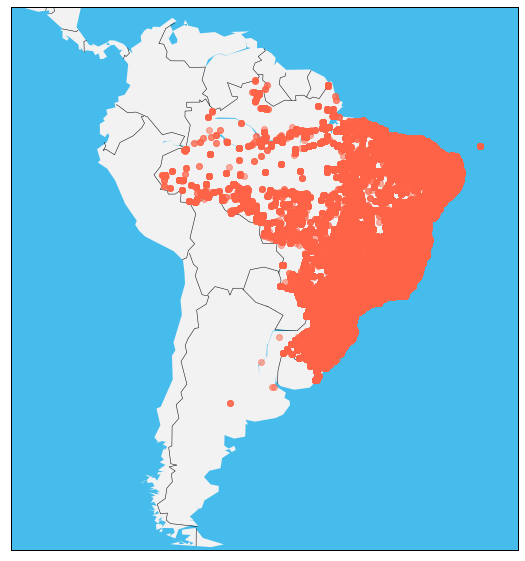

In [4]:
lat = geo_data['geolocation_lat']
lon = geo_data['geolocation_lng']
plt.figure(figsize=(10,10))
m = Basemap(llcrnrlat=-55.401805,llcrnrlon=-92.269176,urcrnrlat=13.884615,urcrnrlon=-27.581676)
m.bluemarble()
m.drawmapboundary(fill_color='#46bcec') 
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec') 
m.drawcountries()
m.scatter(lon, lat,zorder=10,alpha=0.5,color='tomato')

<AxesSubplot:xlabel='geolocation_state', ylabel='count'>

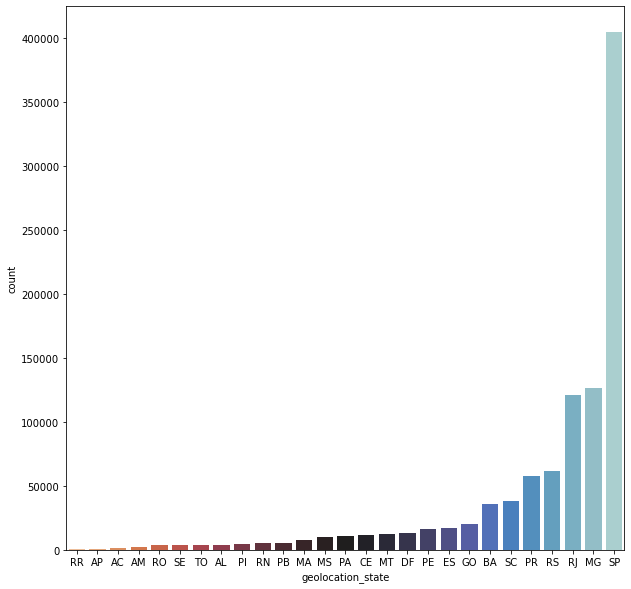

In [5]:
plt.figure(figsize=(10,10))
sns.countplot(x ='geolocation_state', data=geo_data, 
              order=geo_data['geolocation_state'].value_counts().sort_values().index, 
              palette='icefire_r')

#### Data Exploratory

#### Order Data

In [6]:
order_data = pd.read_csv("C:/Users/91983/Desktop/PCS/dataset/olist_orders_dataset.csv")

In [7]:
order_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### Feature Enginering with Time

In [8]:
order_data['order_delivered_customer_date']= order_data['order_delivered_customer_date'].fillna(method='ffill')
order_data['order_delivered_customer_date'].isnull().sum()

0

In [9]:
order_data['delivered_time']=pd.to_datetime(order_data['order_delivered_customer_date'],
                                            format='%Y-%m-%d').dt.date
order_data['estimate_time']=pd.to_datetime(order_data['order_estimated_delivery_date'], 
                                           format='%Y-%m-%d').dt.date

In [10]:
order_data['weekly']=pd.to_datetime(order_data['order_delivered_customer_date'],
                                    format='%Y-%m-%d').dt.week

<ipython-input-10-7141a3e5f4d0>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  order_data['weekly']=pd.to_datetime(order_data['order_delivered_customer_date'],


In [11]:
order_data['yearly']=pd.to_datetime(order_data['order_delivered_customer_date'])\
                    .dt.to_period('M')
order_data['yearly']= order_data['yearly'].astype(str)

In [12]:
order_data['diff_days']= order_data['delivered_time']-order_data['estimate_time']
order_data['diff_days']= order_data['diff_days'].dt.days

Text(0.5, 1.0, 'Average Difference Days per Week')

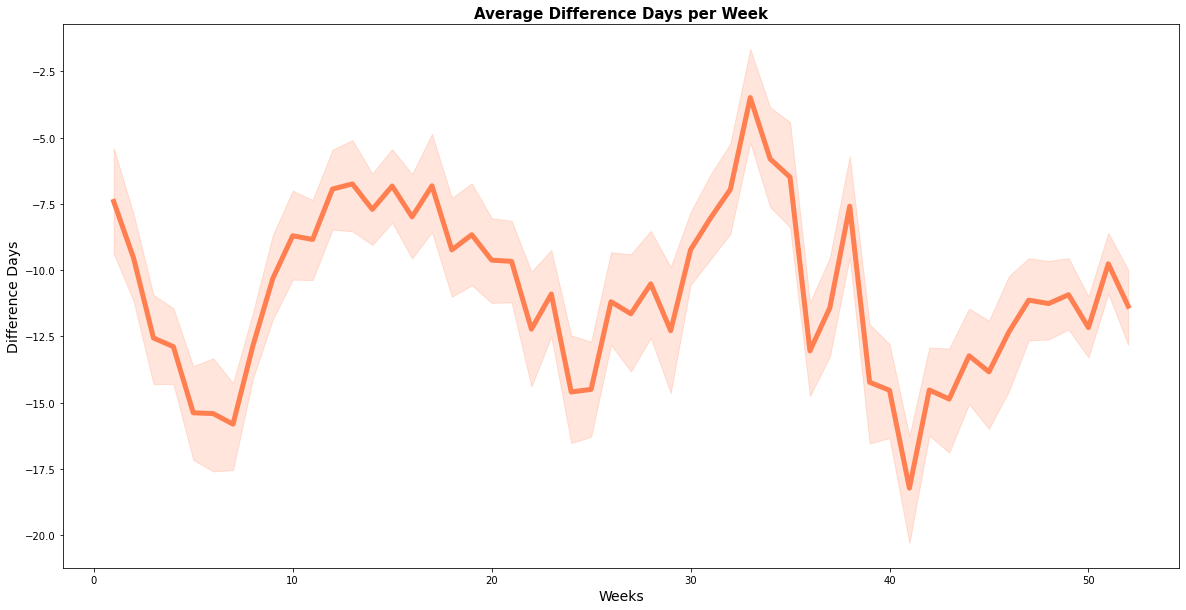

In [13]:
plt.figure(figsize=(20,10))
sns.lineplot(x='weekly', y='diff_days', data=order_data, color="coral", linewidth=5,
            markers=True,dashes=False, estimator='mean')
plt.xlabel("Weeks", size=14)
plt.ylabel("Difference Days", size=14)
plt.title("Average Difference Days per Week",size=15, weight='bold')

#### Customer Top 10 Product

In [14]:
order_item_data = pd.read_csv("C:/Users/91983/Desktop/PCS/dataset/olist_order_items_dataset.csv")
products_data = pd.read_csv("C:/Users/91983/Desktop/PCS/dataset/olist_products_dataset.csv")

In [15]:
total_orders=pd.merge(order_data, order_item_data)
product_orders=pd.merge(total_orders,products_data, on="product_id")
product_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  112650 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   delivered_time                 112650 non-null  object 
 9   estimate_time                  112650 non-null  object 
 10  weekly                         112650 non-null  int64  
 11  yearly                         112650 non-null  object 
 12  diff_days                     

In [16]:
len(product_orders['product_id'].unique())

32951

In [17]:
len(product_orders['product_id'].str[-8:].unique())

32951

In [18]:
product_orders['product_id_shorten']=product_orders['product_id'].str[-8:]

Text(0.5, 1.0, 'Top 10 Products')

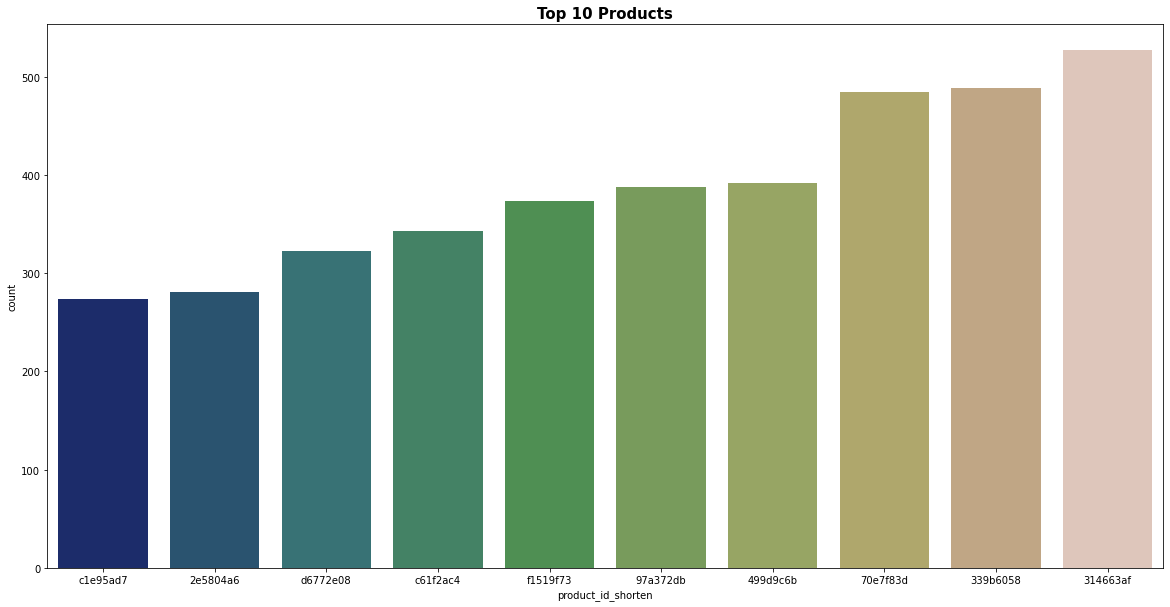

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x='product_id_shorten', data=product_orders, palette='gist_earth',
             order=product_orders['product_id_shorten'].value_counts()[:10]\
             .sort_values().index).set_title("Top 10 Products", fontsize=15,
                                             weight='bold')

In [20]:
product_orders.groupby(["product_category_name"])["product_id_shorten"].count().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: product_id_shorten, dtype: int64

In [21]:
group_category= product_orders.groupby(['product_id_shorten','product_category_name',])['product_id_shorten']\
                                        .count().sort_values(ascending=False).head(10)
group_category

product_id_shorten  product_category_name 
314663af            moveis_decoracao          527
339b6058            cama_mesa_banho           488
70e7f83d            ferramentas_jardim        484
499d9c6b            ferramentas_jardim        392
97a372db            ferramentas_jardim        388
f1519f73            ferramentas_jardim        373
c61f2ac4            informatica_acessorios    343
d6772e08            relogios_presentes        323
2e5804a6            beleza_saude              281
c1e95ad7            informatica_acessorios    274
Name: product_id_shorten, dtype: int64

#### Top 10 Seller

In [22]:
sellers_data = pd.read_csv("C:/Users/91983/Desktop/PCS/dataset/olist_sellers_dataset.csv")

In [23]:
seller_products = pd.merge(product_orders, sellers_data, on="seller_id")
seller_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  112650 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   delivered_time                 112650 non-null  object 
 9   estimate_time                  112650 non-null  object 
 10  weekly                         112650 non-null  int64  
 11  yearly                         112650 non-null  object 
 12  diff_days                     

In [24]:
len(seller_products['seller_id'].unique())

3095

In [25]:
len(seller_products['seller_id'].str[-6:].unique())

3095

In [26]:
seller_products['seller_id_shorten']=seller_products['seller_id'].str[-6:]

Text(0.5, 1.0, 'Top 10 Seller')

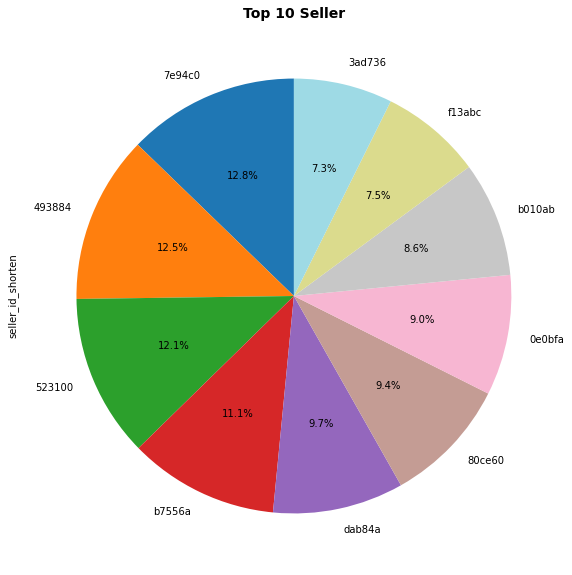

In [27]:
plt.figure(figsize=(20,10))
seller_products['seller_id_shorten'].value_counts()[:10].plot.pie(autopct='%1.1f%%',
        shadow=False, startangle=90, cmap='tab20')
plt.title("Top 10 Seller",size=14, weight='bold')

In [28]:
seller_category= seller_products.groupby(['seller_id_shorten', 'product_category_name'])\
                        ['seller_id_shorten'].count().sort_values(ascending=False).head(10)
seller_category

seller_id_shorten  product_category_name
523100             ferramentas_jardim       1882
7e94c0             relogios_presentes       1628
493884             cama_mesa_banho          1572
0e0bfa             moveis_decoracao         1292
dab84a             cama_mesa_banho          1277
b010ab             moveis_escritorio        1233
f13abc             telefonia                1178
b7556a             beleza_saude             1091
3ad736             cool_stuff               1069
3b52b2             relogios_presentes       1002
Name: seller_id_shorten, dtype: int64

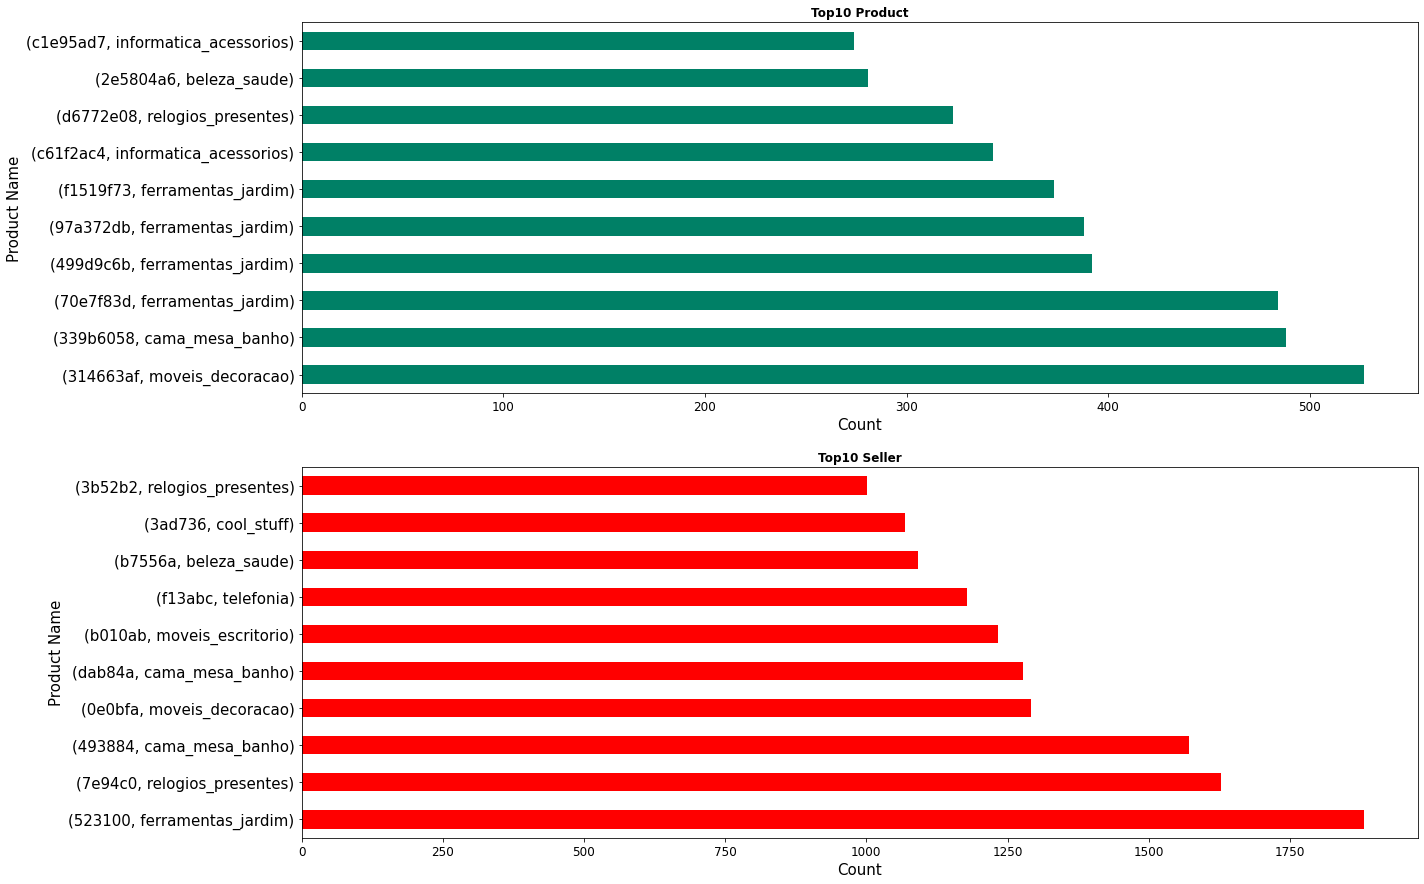

In [29]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,15))
group_category.plot.barh(ax=ax1, cmap='summer')
seller_category.plot.barh(ax=ax2, cmap='autumn')
ax1.set_title('Top10 Product', fontweight='bold')
ax2.set_title('Top10 Seller', fontweight='bold')
ax1.set_xlabel('Count', fontsize=15)
ax1.set_ylabel('Product Name', fontsize=15)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=15)
ax2.set_xlabel('Count', fontsize=15)
ax2.set_ylabel('Product Name', fontsize=15)
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=15)

In [30]:
product_orders['order_week']= pd.to_datetime(product_orders['order_purchase_timestamp'],
                                            format='%Y-%m-%d').dt.week

<ipython-input-30-fa4839bced98>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  product_orders['order_week']= pd.to_datetime(product_orders['order_purchase_timestamp'],


D:\anacondapython\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Weekly Purchased Number of `314663af`')

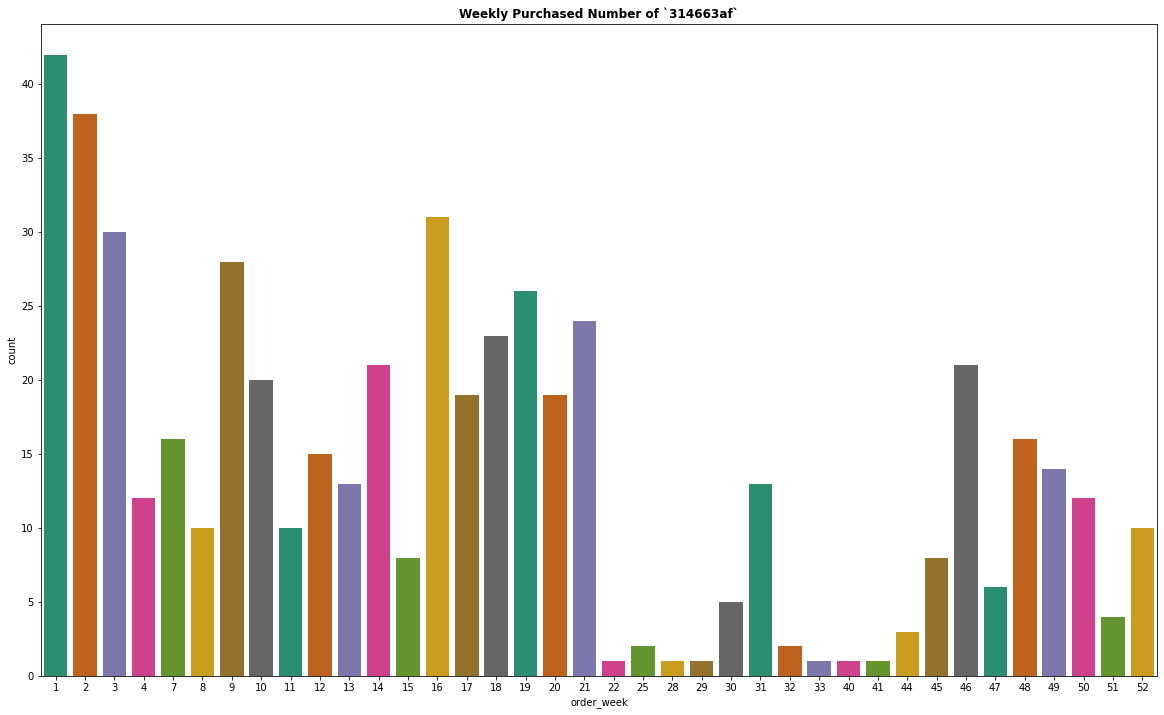

In [31]:
plt.figure(figsize=(20,12))
sns.countplot('order_week', data=product_orders[product_orders['product_id_shorten']== 
                                        '314663af'], palette='Dark2', linewidth=5)\
                                        .set_title('Weekly Purchased Number of `314663af`'
                                                   ,fontweight='bold')

In [32]:
items_weekly =product_orders.groupby(['order_week','product_category_name'])\
                        ['product_category_name'].count().sort_values(ascending=False)
most_products= items_weekly.reset_index(name='count')

In [33]:
max_selling_products= most_products[most_products['count'] 
                            == most_products.groupby(['order_week'])\
                            ['count'].transform(max)]
max_selling_products.head(10)

,order_week,product_category_name,count
0,47,cama_mesa_banho,438
2,33,cama_mesa_banho,355
3,29,cama_mesa_banho,339
4,32,beleza_saude,330
5,8,informatica_acessorios,330
8,31,beleza_saude,320
9,9,informatica_acessorios,314
10,19,beleza_saude,310
11,18,beleza_saude,302
12,23,cama_mesa_banho,301


In [34]:
max_selling_products['product_category_name'].value_counts()

cama_mesa_banho           33
beleza_saude              10
informatica_acessorios     3
esporte_lazer              3
moveis_decoracao           2
brinquedos                 1
Name: product_category_name, dtype: int64

#### Payments

In [35]:
payment_data = pd.read_csv("C:/Users/91983/Desktop/PCS/dataset/olist_order_payments_dataset.csv")

In [36]:
payments=pd.merge(seller_products, payment_data, on="order_id")
payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   customer_id                    117601 non-null  object 
 2   order_status                   117601 non-null  object 
 3   order_purchase_timestamp       117601 non-null  object 
 4   order_approved_at              117586 non-null  object 
 5   order_delivered_carrier_date   116356 non-null  object 
 6   order_delivered_customer_date  117601 non-null  object 
 7   order_estimated_delivery_date  117601 non-null  object 
 8   delivered_time                 117601 non-null  object 
 9   estimate_time                  117601 non-null  object 
 10  weekly                         117601 non-null  int64  
 11  yearly                         117601 non-null  object 
 12  diff_days                     

In [37]:
payments= payments.drop(columns=['product_name_lenght','product_description_lenght',
                                 'product_photos_qty','product_weight_g','product_length_cm',
                                 'product_height_cm','product_width_cm'])

In [38]:
price_details= payments.groupby(['order_id','price','product_category_name',
                                 'yearly','weekly'])[['freight_value','payment_value']].sum().reset_index()

In [39]:
price_details['total_order_value'] = price_details['price'] + price_details['freight_value']

In [40]:
price_details['gross_profit'] = price_details['payment_value']- price_details['total_order_value']
price_details['profit_margin'] = price_details['gross_profit']/price_details['payment_value']
price_details['profit_margin'] = price_details['profit_margin'].astype('int64')

In [41]:
price_details.sort_values('gross_profit', ascending=False).head(10)

,order_id,price,product_category_name,yearly,weekly,freight_value,payment_value,total_order_value,gross_profit,profit_margin
1466,03caa2c082116e1d31e67e9ae3700499,1680.00,telefonia_fixa,2017-10,42,224.08,109312.64,1904.08,107408.56,0
66523,ab14fdcfbe524636d65ee38360e22ce8,98.70,automotivo,2017-09,35,288.80,45256.00,387.50,44868.50,0
10548,1b15974a0141d54e36626dca3fdc731a,100.00,informatica_acessorios,2018-03,10,202.40,44048.00,302.40,43745.60,0
17262,2cc9089445046817a7539d90805e6e5a,989.10,agro_industria_e_comercio,2017-12,50,146.94,36489.24,1136.04,35353.20,0
90941,e8fa22c3673b1dd17ea315021b1f0f61,284.99,bebidas,2018-05,18,168.70,30186.00,453.69,29732.31,0
44991,736e1922ae60d0d6a89247b851902527,1790.00,telefonia_fixa,2018-07,30,114.88,29099.52,1904.88,27194.64,0
25844,428a2f660dc84138d969ccd69a0ab6d5,65.49,moveis_decoracao,2017-12,50,243.30,18384.75,308.79,18075.96,0
22593,3a213fcdfe7d98be74ea0dc05a8b31ae,108.00,relogios_presentes,2018-01,4,186.24,17786.88,294.24,17492.64,0
96747,f80549a97eb203e1566e026ab66f045b,137.90,informatica_acessorios,2017-09,39,388.10,17671.00,526.00,17145.00,0
26447,4412d97cb2093633afa85f11db46316c,120.00,informatica_acessorios,2018-06,23,83.99,15978.65,203.99,15774.66,0


Text(0.5, 1.0, 'Gross Profit of Top 5 Products (2016-2018)')

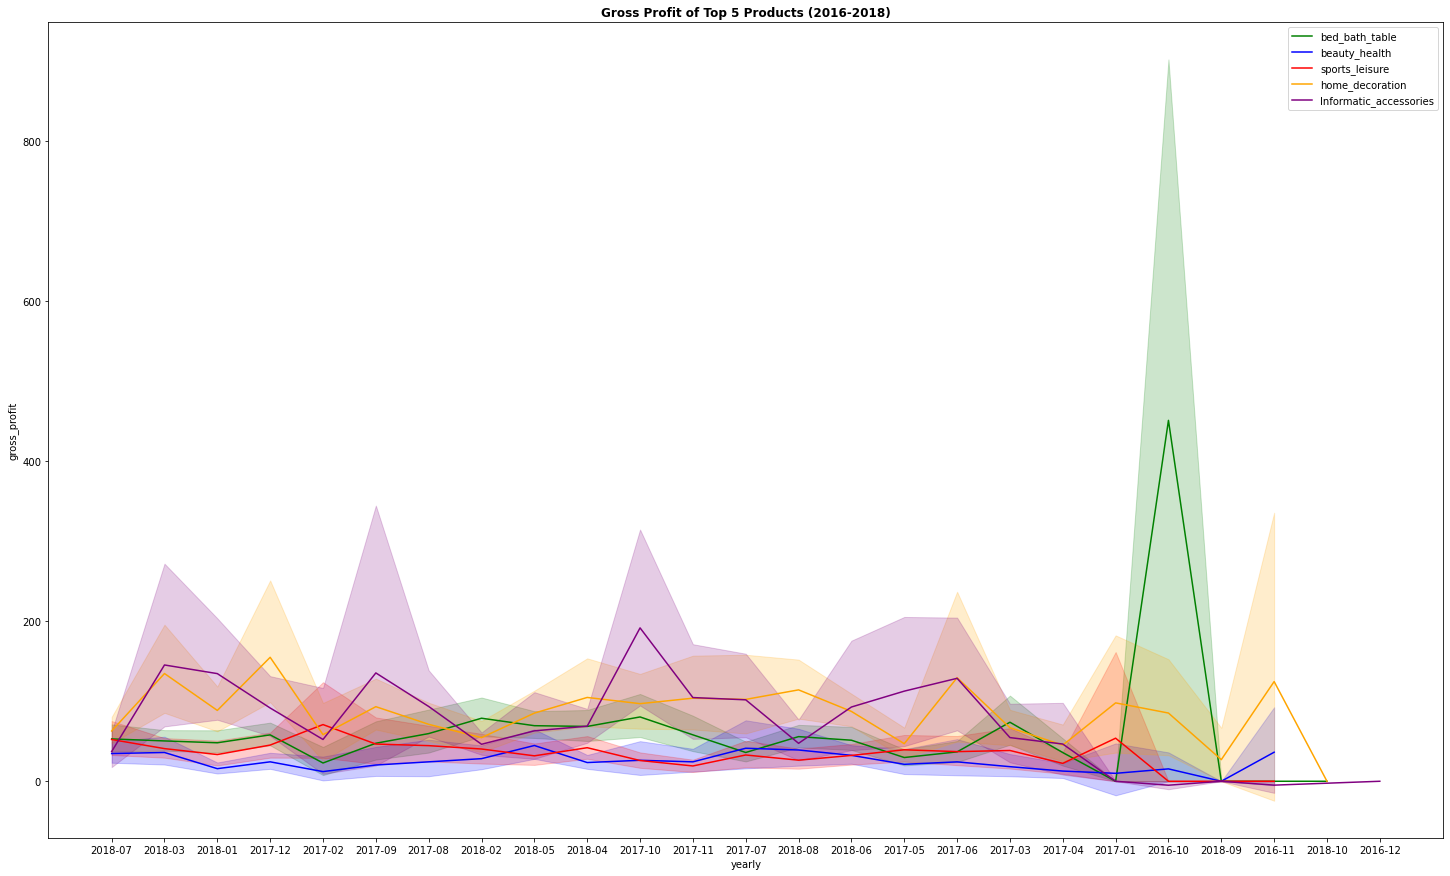

In [42]:
plt.figure(figsize=(25,15))
sns.lineplot(x='yearly',y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='cama_mesa_banho'], label='bed_bath_table',color="green")
sns.lineplot(x='yearly', y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='beleza_saude'], label='beauty_health', color="blue")
sns.lineplot(x='yearly', y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='esporte_lazer'], label='sports_leisure', color="red")
sns.lineplot(x='yearly', y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='moveis_decoracao'], label='home_decoration', color="orange")
sns.lineplot(x='yearly', y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='informatica_acessorios'], label='Informatic_accessories', color="purple")
plt.title("Gross Profit of Top 5 Products (2016-2018)",fontweight='bold')